In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = r'C:\Users\dell\OneDrive\Documents\classification\train'#replace alll the path with your own path
data_test_path = r'C:\Users\dell\OneDrive\Documents\classification\test'
data_val_path = r'C:\Users\dell\OneDrive\Documents\classification\validation'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 460 files belonging to 3 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple', 'banana', 'orange']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 66 files belonging to 3 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 130 files belonging to 3 classes.


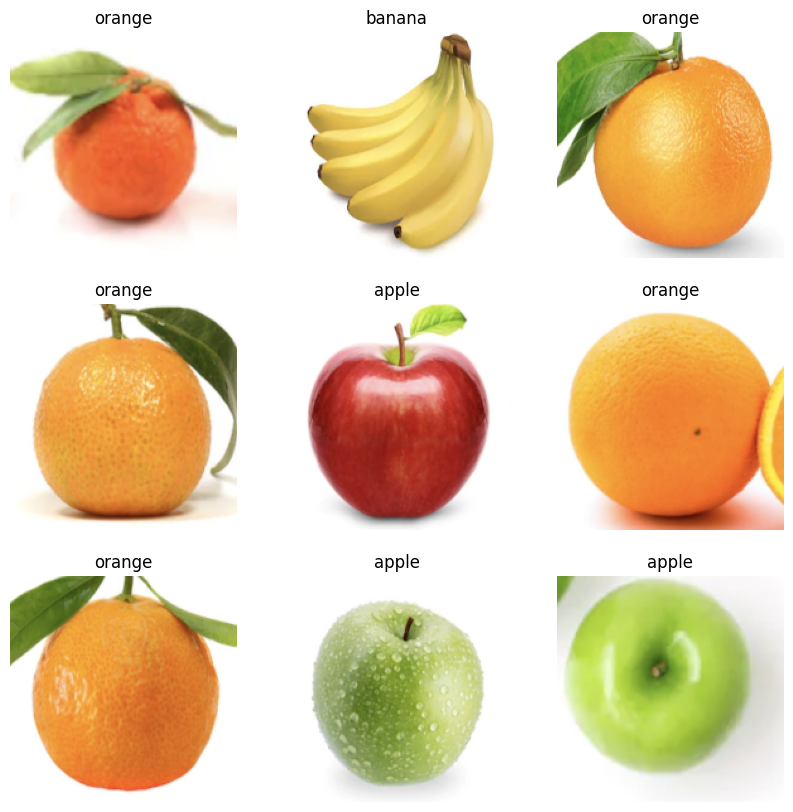

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 20
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 428ms/step - accuracy: 0.3369 - loss: 4.5652 - val_accuracy: 0.6364 - val_loss: 1.0110
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step - accuracy: 0.7404 - loss: 0.7927 - val_accuracy: 0.7273 - val_loss: 0.5471
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 399ms/step - accuracy: 0.9009 - loss: 0.3305 - val_accuracy: 0.8939 - val_loss: 0.2576
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 474ms/step - accuracy: 0.9427 - loss: 0.1370 - val_accuracy: 0.9545 - val_loss: 0.1167
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 406ms/step - accuracy: 0.9671 - loss: 0.1062 - val_accuracy: 0.9545 - val_loss: 0.1013
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 414ms/step - accuracy: 0.9744 - loss: 0.0621 - val_accuracy: 0.9848 - val_loss: 0.0713
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 392ms/step - accuracy: 0.9808 - loss: 0.0662 - val_accuracy: 0.9545 - val_loss: 0.0900
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - accuracy: 0.9832 - loss: 0.0424 - val_accuracy: 0

Text(0.5, 1.0, 'Loss')

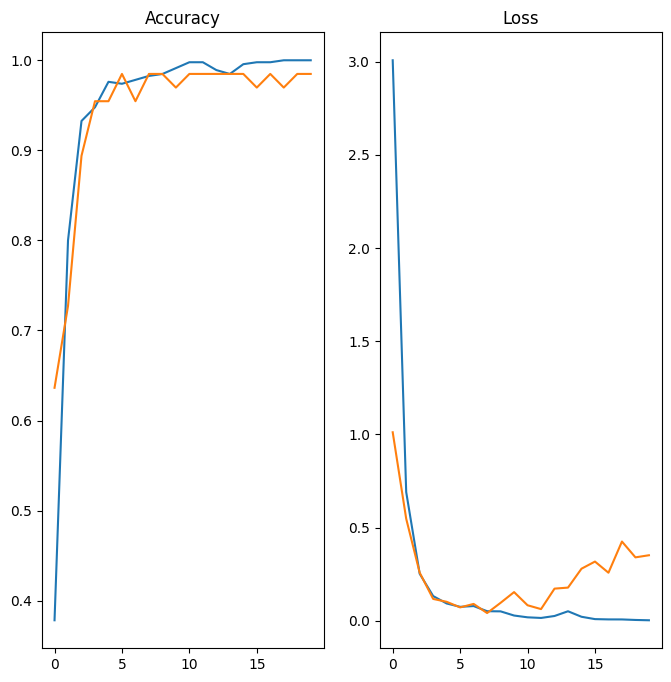

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [16]:
image = r"C:\Users\dell\OneDrive\Pictures\images\apple.jfif"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [17]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


In [18]:
score = tf.nn.softmax(predict)

In [22]:
print('Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Fruit in image is apple with accuracy of 100.00


In [20]:
model.save('Image_classify.keras')